# Spaceship Titanic

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

## Data Exploration

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                                       
import numpy as np
from sklearn.preprocessing import LabelEncoder

**train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

- `PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- `HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.
- `CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- `Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- `Destination` - The planet the passenger will be debarking to.
- `Age` - The age of the passenger.
- `VIP` - Whether the passenger has paid for special VIP service during the voyage.
- `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- `Name` - The first and last names of the passenger.
- `ransported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict

In [43]:
df_og = pd.read_csv('train.csv')
df = df_og.copy()

In [3]:
print('Shape of the data', df.shape)

Shape of the data (8693, 14)


In [4]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### Departure/Destinations

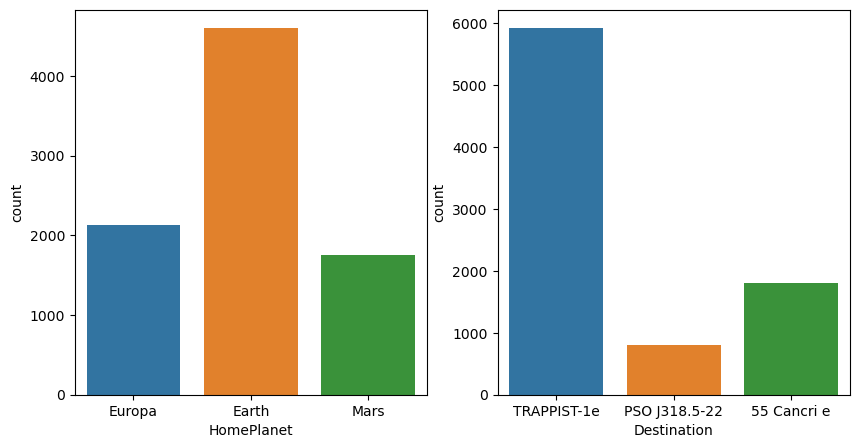

In [5]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x=df.HomePlanet, ax=ax[0])
sns.countplot(x=df.Destination, ax=ax[1])
plt.show()

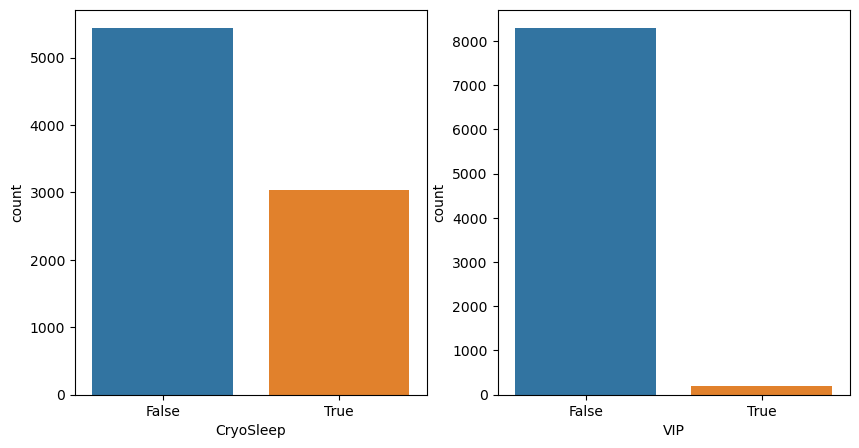

In [6]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.countplot(x=df.CryoSleep, ax=ax[0])
sns.countplot(x=df.VIP, ax=ax[1])
plt.show()

### Explore the distributions of the numerical values

**Thoughts**

- `Numerical values are not distributed uniformly`: All of the variables (except for age) will need to be log adjusted
- `A lot of empty values`: will replace them with the mean or median of the columns
- `Check correlation between the variables`: {conclusion and mode of action}

In [7]:
num_vars = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

df[num_vars].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


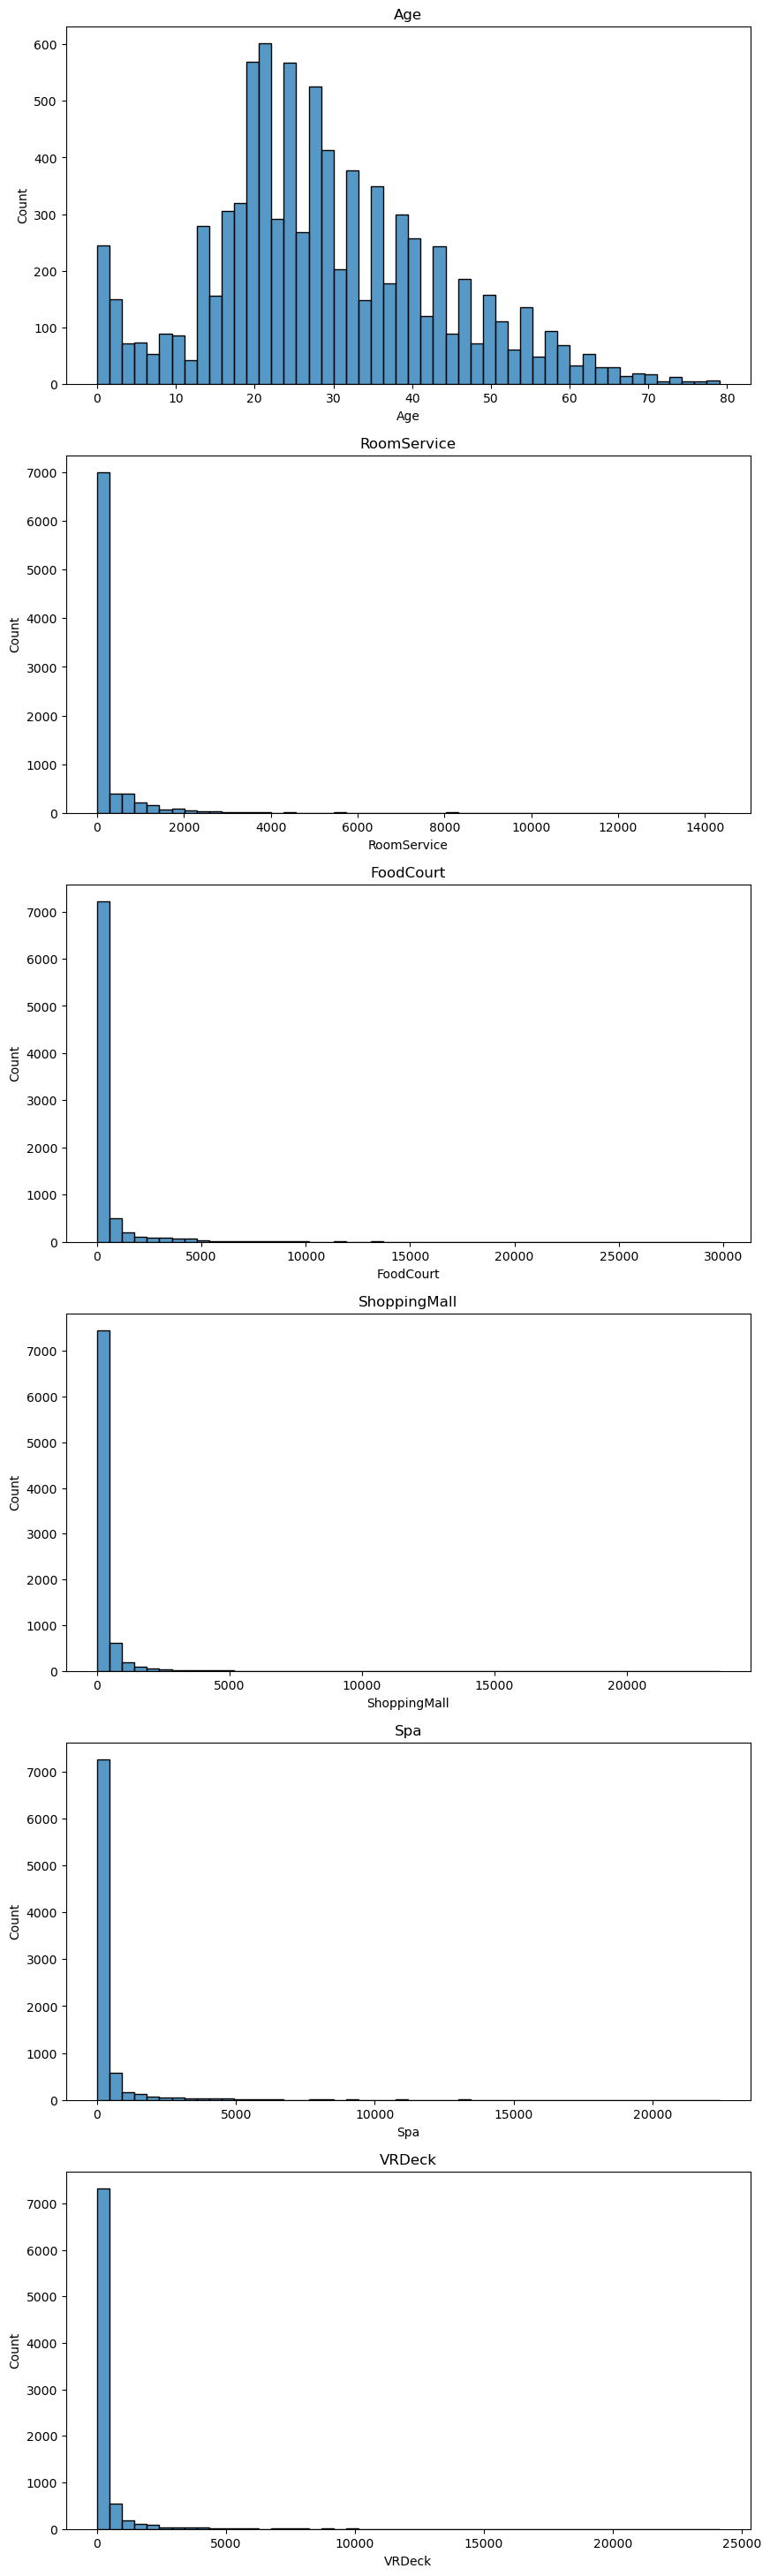

In [8]:
fig, ax = plt.subplots(6, 1,  figsize=(10, 15))
plt.subplots_adjust(top = 2)

for i,col in enumerate(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']):
    sns.histplot(df[col], bins=50, ax=ax[i]);
    ax[i].set_title(col)

### Check for missing values

In [44]:
print('Number of "NaN" values')
print(df_og.isnull().sum(),'\n') # Check for missing values
print('Number of infinite values')
print(np.isinf(df_og[num_vars]).sum(), '\n') # Check for infinite values

Number of "NaN" values
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64 

Number of infinite values
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64 



We will replace the missing values with the median values of the column, instead of the mean to prevent the big numbers of biasing the values.

In [45]:
df[num_vars] = df[num_vars].apply(lambda col: col.fillna(col.median()), axis=0)

In [46]:
df[df.isnull().any(axis=1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
27,0022_01,Mars,False,D/0/P,TRAPPIST-1e,21.0,False,980.0,2.0,69.0,0.0,0.0,NaN,False
38,0036_01,Earth,False,F/8/S,55 Cancri e,15.0,NaN,0.0,492.0,48.0,20.0,401.0,Marina Leodger,False
47,0045_02,Mars,True,F/10/P,NaN,19.0,False,0.0,0.0,0.0,0.0,0.0,Mass Chmad,True
58,0064_01,Mars,True,F/14/S,TRAPPIST-1e,15.0,False,0.0,0.0,0.0,0.0,0.0,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8666,9248_01,NaN,False,F/1792/S,55 Cancri e,38.0,NaN,28.0,1208.0,973.0,207.0,0.0,Gian Perle,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,0.0,Annah Gilleyons,True
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True


## Checking for correlations between the variables

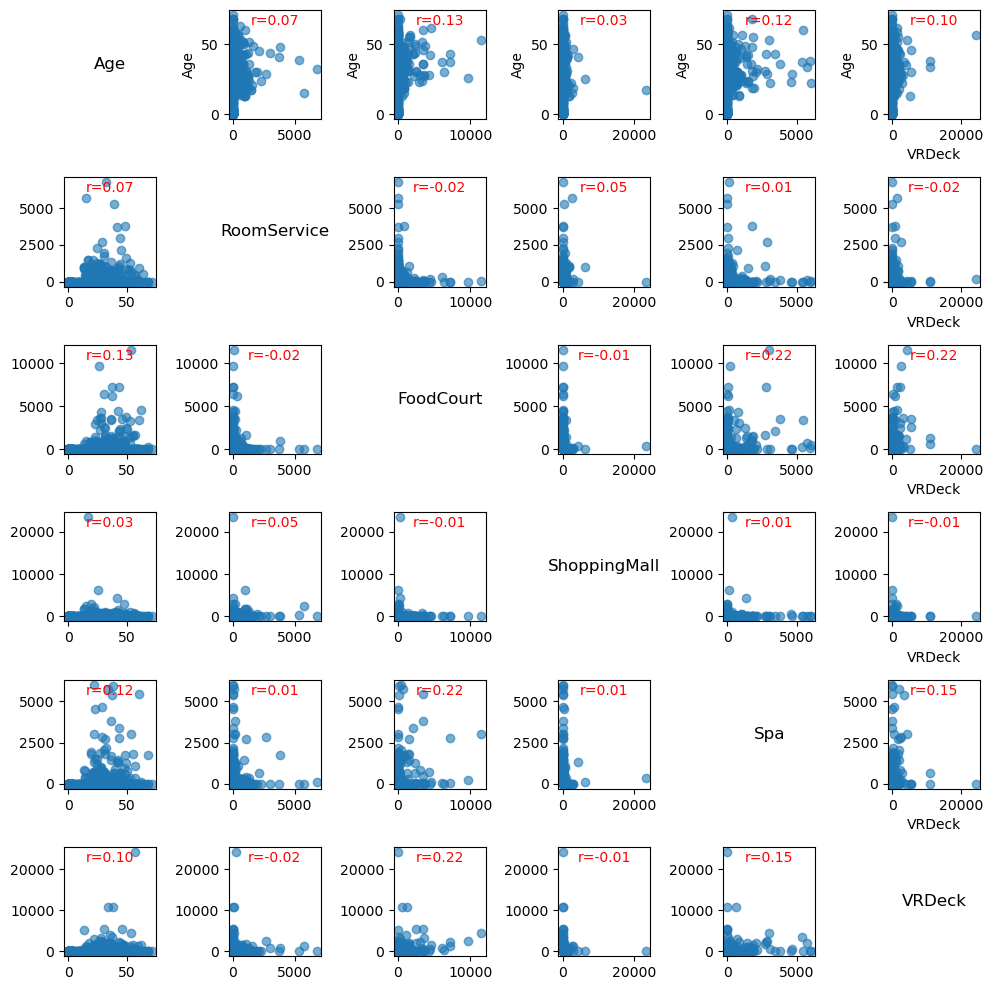

In [47]:
num_cols = len(num_vars)
idx = np.random.choice(len(df), 500)
# Create subplots grid
fig, axes = plt.subplots(num_cols, num_cols, figsize=(10, 10), sharex=False, sharey=False)

# Plot scatterplots
for i, col1 in enumerate(num_vars):
    for j, col2 in enumerate(num_vars):
        ax = axes[i, j]
        if i != j:  # Off-diagonal: scatterplots
            ax.scatter(df[col2].iloc[idx], df[col1].iloc[idx], alpha=0.6)
        
            corr = np.corrcoef(df[col2], df[col1])[0, 1]
            ax.text(0.5, 0.9, f'r={corr:.2f}', transform=ax.transAxes, fontsize=10, 
                    ha='center', va='center', color='red')

        else:  # Diagonal: variable name or histogram
            ax.text(0.5, 0.5, col1, fontsize=12, ha='center', va='center')
            ax.set_axis_off()  # Turn off axis for diagonal
        ax.set_xlabel(col2 if j == num_cols - 1 else '')
        ax.set_ylabel(col1 if i == 0 else '')

# Adjust layout
plt.tight_layout()
plt.show()


None of the variables seem to be correlated with each other

#### Correlation between age, money spent and vip status >> To be able to replace the missing values

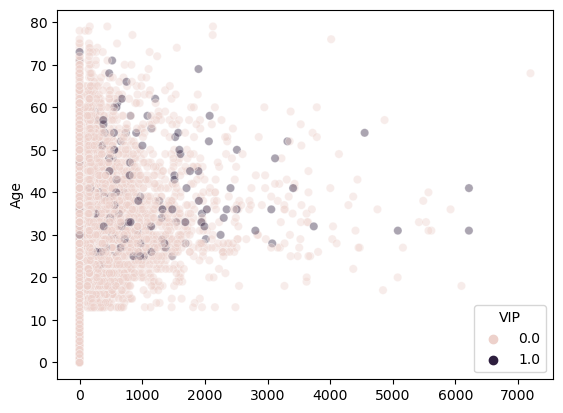

In [13]:
num_row_means = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].apply(lambda row: row.mean(), axis=1)
sns.scatterplot(x=num_row_means, y=df.Age, hue=df.VIP, alpha=0.4)
plt.show()

In [14]:
min(df.Age[df.VIP==True])

18.0

I cannot see a correlation, the only thing I can assume is that if the passanger is under 18, they are not a VIP

## Data Preprocessing & Feature Transformation

### Fill in missing VIP status

In [48]:
df.VIP[(df.VIP.isnull()) & (df.Age<18)] = False

/var/folders/6h/8sfx_lvj7qqcb000hqw9cckw0000gn/T/ipykernel_1460/1967962641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.VIP[(df.VIP.isnull()) & (df.Age<18)] = False


In [52]:
print('Number of "NaN" values BEFORE')
print(df_og.isnull().sum(),'\n') # Check for missing values
print('Number of "NaN" values AFTER')
print(df.isnull().sum(),'\n') # Check for missing values

Number of "NaN" values BEFORE
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64 

Number of "NaN" values AFTER
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             158
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64 



### We log transform the numberical values to prevent bias

In [53]:
df[num_vars[1:]] = df[num_vars[1:]].apply(lambda col: np.where(col > 0, np.log(col), col), axis=0)

/Users/johannawahn/opt/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


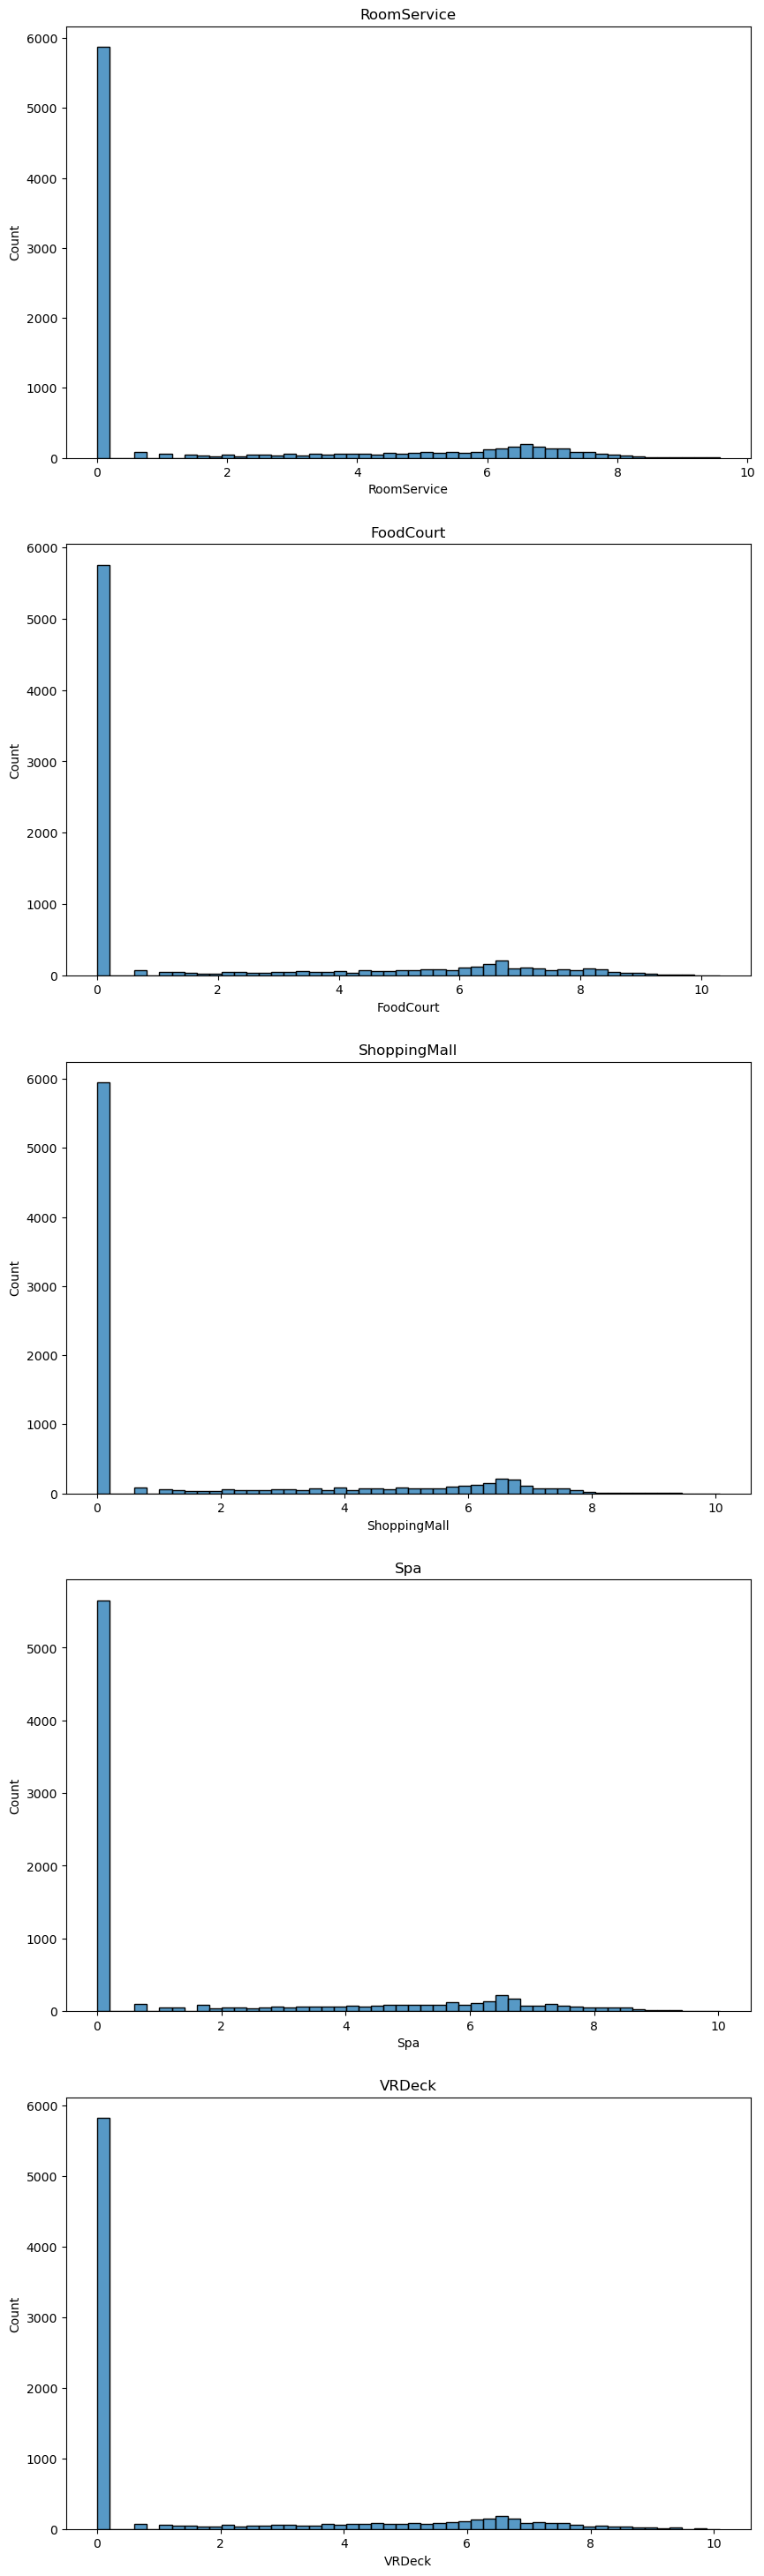

In [54]:
fig, ax = plt.subplots(5, 1,  figsize=(10, 15))
plt.subplots_adjust(top = 2)

for i,col_n in enumerate(num_vars[1:]):  
    sns.histplot(df[num_vars[1:]][col_n], bins=50, ax=ax[i]);
    ax[i].set_title(col_n)

Slight better distribution but still a big skewness towards zero

### How to deal with unique identifiers: PassengerID, RoomID, Destination/Departure Planets etc...

### Separating GroupID and Number of people in the group into two different numerical columns

In [55]:
df[['GroupID', 'PartySize']] = df['PassengerId'].str.split('_', expand=True).astype(int)

In [56]:
df['PartySize'] = df.groupby('GroupID')['PartySize'].transform('max')

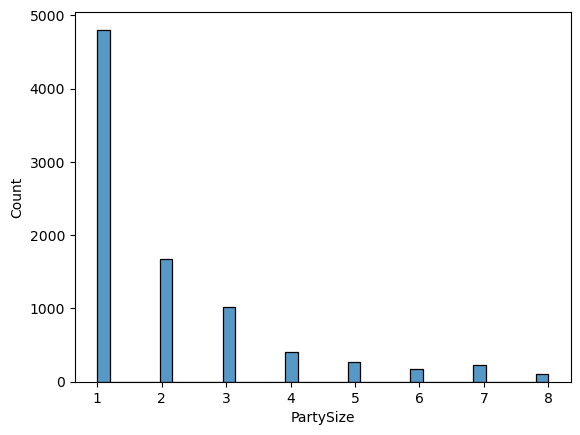

In [57]:
sns.histplot(df.PartySize)
plt.show()

In [58]:
df[['PassengerId','GroupID', 'PartySize']]

,PassengerId,GroupID,PartySize
0,0001_01,1,1
1,0002_01,2,1
2,0003_01,3,2
3,0003_02,3,2
4,0004_01,4,1
...,...,...,...
8688,9276_01,9276,1
8689,9278_01,9278,1
8690,9279_01,9279,1
8691,9280_01,9280,2


In [59]:
max(df.PartySize)

8

In [61]:
df[['Deck', 'RoomNbr','Side']] = df['Cabin'].str.split('/', expand=True)

#### We connect the HomePlanet and Destination 
This way we can capture interactions as we do not have any spatial context

In [62]:
df['Road'] = df['HomePlanet'] + '_' + df['Destination']
df.drop(['HomePlanet','Destination'], axis=1, inplace=True)

#### We drop the unique identifiers
These types of data do not bring any additional infor to the model: PassengerID, Name, Cabin, RoomNbr

In [63]:
df.drop(['PassengerId', 'Name', 'Cabin', 'RoomNbr'], axis=1, inplace=True)

In [64]:
df

/Users/johannawahn/opt/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/Users/johannawahn/opt/anaconda3/envs/MachineLearning/lib/python3.11/site-packages/IPython/core/formatters.py:342: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupID,PartySize,Deck,Side,Road
0,False,39.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,False,1,1,B,P,Europa_TRAPPIST-1e
1,False,24.0,False,4.691348,2.197225,3.218876,6.308098,3.784190,True,2,1,F,S,Earth_TRAPPIST-1e
2,False,58.0,True,3.761200,8.182000,0.000000,8.812099,3.891820,False,3,2,A,S,Europa_TRAPPIST-1e
3,False,33.0,False,0.000000,7.156956,5.916202,8.110427,5.262690,False,3,2,A,S,Europa_TRAPPIST-1e
4,False,16.0,False,5.713733,4.248495,5.017280,6.336826,0.693147,True,4,1,F,S,Earth_TRAPPIST-1e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.000000,8.827468,0.000000,7.404279,4.304065,False,9276,1,A,P,Europa_55 Cancri e
8689,True,18.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,False,9278,1,G,S,Earth_PSO J318.5-22
8690,False,26.0,False,0.000000,0.000000,7.534763,0.000000,0.000000,True,9279,1,G,S,Earth_TRAPPIST-1e
8691,False,32.0,False,0.000000,6.955593,0.000000,5.866468,8.081784,False,9280,2,E,S,Europa_55 Cancri e


## Encoding Categorical data
To make the data readable for the model we will transform the categorical datas: GroupID, Deck, Side, Road

In [80]:
print('Deck:', df[['Deck']].value_counts())
print('Side:', df[['Side']].value_counts())
print('Road:', df[['Road']].value_counts())

Deck: Deck
F       2794
G       2559
E        876
B        779
C        747
D        478
A        256
T          5
dtype: int64
Side: Side
S       4288
P       4206
dtype: int64
Road: Road                
Earth_TRAPPIST-1e       3101
Mars_TRAPPIST-1e        1475
Europa_TRAPPIST-1e      1189
Europa_55 Cancri e       886
Earth_PSO J318.5-22      712
Earth_55 Cancri e        690
Mars_55 Cancri e         193
Mars_PSO J318.5-22        49
Europa_PSO J318.5-22      19
dtype: int64


We can consider the side as a boolean and then transform Deck and Road with Label Encodings as One-Hot encoding would make the table too big

In [82]:
le_Deck = LabelEncoder()
le_Deck.fit(df.Deck)
df['Deck'] = le_Deck.transform(df.Deck)

LabelEncoder()

In [92]:
le_Road = LabelEncoder()
le_Road.fit(df.Road)
df['Road'] = le_Road.transform(df.Road)

In [96]:
df['CryoSleep'] = df['CryoSleep'].map({True: 1, False: 0})
df['VIP'] = df['VIP'].map({True: 1, False: 0})
df['Side'] = df['Side'].map({'P': 1, 'S': 0})

In [102]:
df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupID,PartySize,Deck,Side,Road
0,0.0,39.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,False,1,1,1,1.0,5
1,0.0,24.0,0.0,4.691348,2.197225,3.218876,6.308098,3.784190,True,2,1,5,0.0,2
2,0.0,58.0,1.0,3.761200,8.182000,0.000000,8.812099,3.891820,False,3,2,0,0.0,5
3,0.0,33.0,0.0,0.000000,7.156956,5.916202,8.110427,5.262690,False,3,2,0,0.0,5
4,0.0,16.0,0.0,5.713733,4.248495,5.017280,6.336826,0.693147,True,4,1,5,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,41.0,1.0,0.000000,8.827468,0.000000,7.404279,4.304065,False,9276,1,0,1.0,3
8689,1.0,18.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,False,9278,1,6,0.0,1
8690,0.0,26.0,0.0,0.000000,0.000000,7.534763,0.000000,0.000000,True,9279,1,6,0.0,2
8691,0.0,32.0,0.0,0.000000,6.955593,0.000000,5.866468,8.081784,False,9280,2,4,0.0,3


This will be the final input for the model 